Lets first load few libraries. lphys is where we define our utility functions.

In [1]:
import lphys
import uproot
import matplotlib.pyplot as plt
import mplhep as hep

We will load two files: one with data, the other with simulation. You can change the datafile to use the electrons dataset instead. You can also change the simulation for the CMS simulation.

Files are in the ROOT format, and can be opened with the uproot package. We then locate the tree with event data in the opened file.

In [2]:
# input files
data_file = "/home/cms-opendata/CMSSW_5_3_32/src/Labo/WeakBosonsAnalyzer/test/LPHY2131tree.root"

In [3]:
datafile = uproot.open(data_file)
datatree = datafile['LPHY2131analysis/WeakBosonsAnalysis']

The content of the tree can be checked with the command below. As you can see, we find back all the branches introduced during the first session, with the C++ type, and the python equivalent.
uproot will give us access to each branch through objects very similar to Numpy arrays (Akward arrays are basically non-rectangular Numpy arrays (we need that since the number of muons, electrons or jets varies from event to event.

In [4]:
datatree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
nMuons               | int32_t                  | AsDtype('>i4')
MuonsPt              | float[]                  | AsJagged(AsDtype('>f4'))
MuonsEta             | float[]                  | AsJagged(AsDtype('>f4'))
MuonsPhi             | float[]                  | AsJagged(AsDtype('>f4'))
nElectrons           | int32_t                  | AsDtype('>i4')
ElectronsPt          | float[]                  | AsJagged(AsDtype('>f4'))
ElectronsEta         | float[]                  | AsJagged(AsDtype('>f4'))
ElectronsPhi         | float[]                  | AsJagged(AsDtype('>f4'))
invMass              | float                    | AsDtype('>f4')
transvMass           | float                    | AsDtype('>f4')
dileptonPt           | float                    | AsDtype('>f4')
dileptonEta          | float                    | AsDtype('>f4'

In [5]:
#selected_data = drawBranch(datatree,"MuonsPt")
selected_data = lphys.analyzeTree(datatree,"MuonsPt",simpleselection=lambda events:events.nMuons>0,index=0)

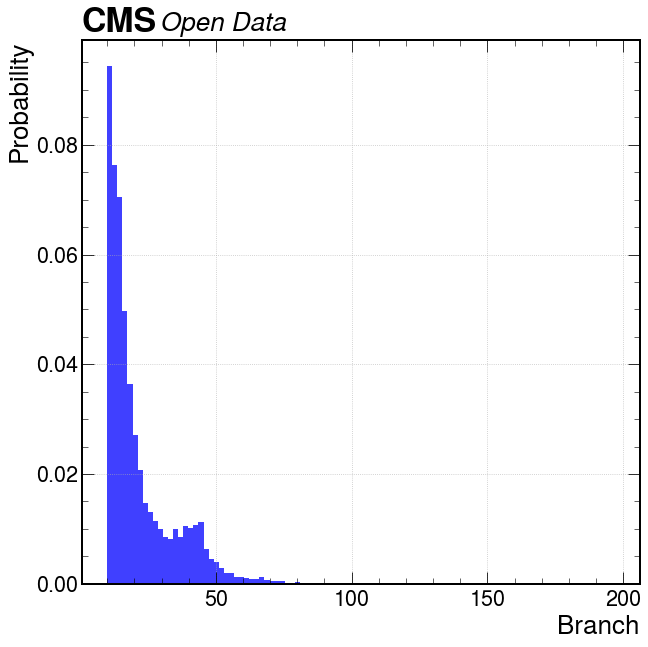

In [6]:
hep.set_style(hep.style.CMS)
hep.cms.text("Open Data")
# the histogram of the data
n, bins, patches = plt.hist(selected_data, 100, density=True, facecolor='b', alpha=0.75)
plt.xlabel('Branch')
plt.ylabel('Probability')
#plt.xlim(40, 140)
#plt.ylim(0, 0.3)
plt.grid(True)